In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pickle

In [ ]:
df = pd.read_csv(r'/content/University_extended.xls')

In [ ]:
df.head()

,id,instituionname,survey_year,playground,auditorium,theatre,library,laboratory,conference_hall,health_center,gymnasium_fitness_center,indoor_stadium,common_room,computer_center,cafeteria
0,1,Dr Y S R Horticulture University,2015,1,1,1,1,1,1,1,1,1,1,1,1
1,2,"A.P. University of Law, Vishakhapatnam",2015,0,1,0,1,0,1,1,0,0,0,1,0
2,3,"Acharya Nagarjuna University, Guntur",2015,1,1,1,1,1,0,1,0,1,1,1,1
3,4,"Acharya NG Ranga Agricultural University, Hyde...",2015,0,0,0,0,0,0,0,0,0,0,0,0
4,5,"Adikavi Nannaya University, Rajahmundry, East ...",2015,1,1,1,1,1,1,1,0,0,1,1,1


In [ ]:
df['instituionname'].unique()

array(['Dr Y S R Horticulture University',
       'A.P. University of Law, Vishakhapatnam',
       'Acharya Nagarjuna University, Guntur',
       'Acharya NG Ranga Agricultural University, Hyderabad',
       'Adikavi Nannaya University, Rajahmundry, East Godawari',
       'Andhra University, Visakhapatnam',
       'Dr. N.T.R. University of Health Sciences, Vijaywada',
       'Dr.B.R.Ambedkar University, Etcherla',
       'Dravidian University, Kuppam, Chittoor District',
       'Gandhi Institute of Technology & Management (GITAM) University, Visakhapatnam',
       'ICFAI Foundation for Higher Education, Hyderabad',
       'International Institute of Information Technology, Hyderabad',
       'Jawaharlal Nehru Technological University, Kakinada',
       'Jawaharlal Nehru Technological University, Anantapur',
       'Jawaharlal Nehru Technological University, Hyderabad',
       'Jawarharlal Nehru Architecture and Fine Art University Hyderabad',
       'Kakatiya University, Warangal',
   

In [ ]:
df.dtypes

id                           int64
instituionname              object
survey_year                  int64
playground                   int64
auditorium                   int64
theatre                      int64
library                      int64
laboratory                   int64
conference_hall              int64
health_center                int64
gymnasium_fitness_center     int64
indoor_stadium               int64
common_room                  int64
computer_center              int64
cafeteria                    int64
dtype: object

In [ ]:
df['instituionname'].value_counts()

Dr Y S R Horticulture University                                  2
Biju Patnaik University of Technology, Rourkela                   2
Shri Jagannath Sanskrit Vishwavidyalaya, Puri                     2
Siksha 'O' Anusandhan University                                  2
Sambalpur University, Sambalpur                                   2
                                                                 ..
ICFAI UNIVERSITY                                                  1
BILASPUR VISHWAVIDYALAYA                                          1
UNIVERSITY OF AGRICULTURAL AND HORTICULTURAL SCIENCES, SHIMOGA    1
GRAPHIC ERA HILL UNIVERSITY                                       1
SAI NATH UNIVERSITY                                               1
Name: instituionname, Length: 754, dtype: int64

<ipython-input-8-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

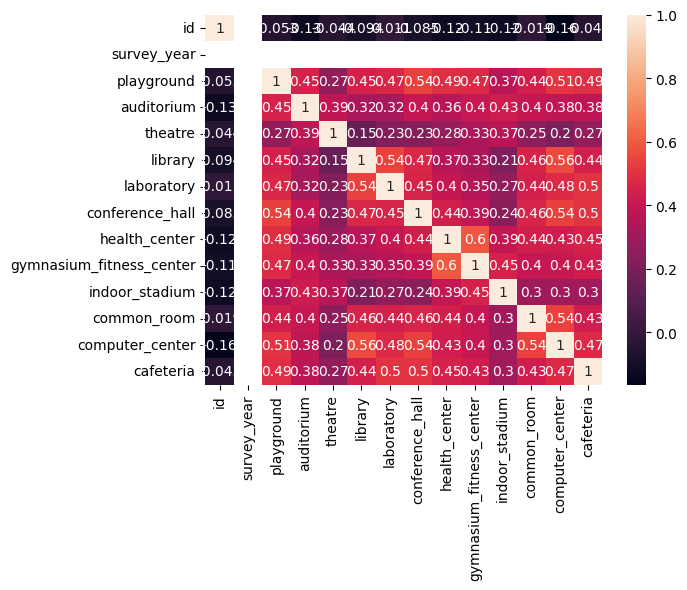

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#Seperating features and target label
features = df[['playground','auditorium','theatre','library','laboratory','conference_hall','health_center','gymnasium_fitness_center','indoor_stadium','common_room','computer_center','cafeteria'  ]]
target = df['instituionname']

In [ ]:
##accuracy and model name
acc = []
model = []

In [ ]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

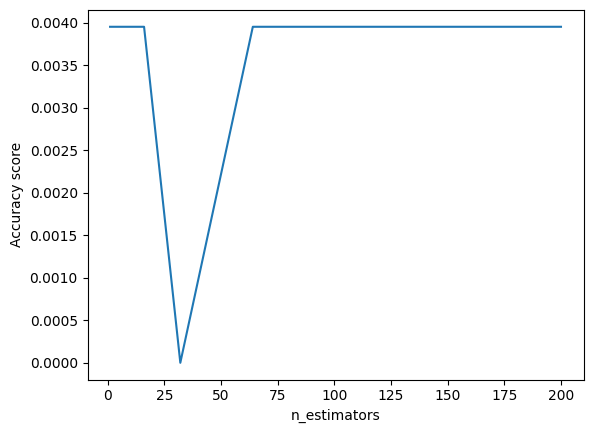

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
acc_score = []
n_estimators = [1, 2, 4, 8,  16, 32, 64, 100, 200]
for i in n_estimators:
    RF = RandomForestClassifier(n_estimators=i, random_state=2)
    RF.fit(Xtrain,Ytrain)
    predicted_values = RF.predict(Xtest)

    x = metrics.accuracy_score(Ytest, predicted_values)
    acc_score.append(x) 
    
plt.plot(n_estimators, acc_score, label='Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.show()  

In [ ]:
RF.fit(Xtrain,Ytrain)
predicted_train = RF.predict(Xtrain)
predicted_train

array(['Mohan Lal Sukhadia University, Uaipur',
       'Swami Vivekananda Yoga Anusandhana Samsthan, Bangalore',
       'Jagannath University, Jaipur', ...,
       'Mohan Lal Sukhadia University, Uaipur',
       'Indian Institute of Technology, Gandhinagar',
       'Jagannath University, Jaipur'], dtype=object)

In [ ]:
Ytrain

852                Indira Gandhi National Open University
986     Swami Vivekananda Yoga Anusandhana Samsthan, B...
505                         Santosh University, Ghaziabad
287     Dr. Babasaheb Ambedkar Marathwada University, ...
897                         Saurashtra University, Rajkot
                              ...                        
466                    Aligarh Muslim University, Aligarh
299     Kavi Kulguru Kalidas Sanskrit Vishwavidyalaya,...
493     Mahatama Jyotiba Phule Rohikhand University, B...
527     University of Petroleum and Energy Studies, De...
1192    Noorul Islam Centre for Higher Education, Kany...
Name: instituionname, Length: 1008, dtype: object

In [ ]:
RF = RandomForestClassifier(n_estimators=16, random_state=2)

In [ ]:
RF.fit(Xtrain,Ytrain)
predicted_train = RF.predict(Xtrain)


In [ ]:
metrics.accuracy_score(Ytrain,predicted_train)

0.1597222222222222

In [ ]:
acc_score

[0.003952569169960474,
 0.003952569169960474,
 0.003952569169960474,
 0.003952569169960474,
 0.003952569169960474,
 0.0,
 0.003952569169960474,
 0.003952569169960474,
 0.003952569169960474]

In [ ]:
RF = RandomForestClassifier(n_estimators=10, random_state=2)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('RF')                   #model name
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.003952569169960474
                                                                                            precision    recall  f1-score   support

                                                               A P GOYAL SHIMLA UNIVERSITY       0.00      0.00      0.00         1
                                                    A.P. University of Law, Vishakhapatnam       0.00      0.00      0.00         0
                                      ALL INDIA INSTITUTE OF MEDICAL SCIENCES, BHUBANESWAR       0.00      0.00      0.00         0
                                            ALL INDIA INSTITUTE OF MEDICAL SCIENCES, PATNA       0.00      0.00      0.00         1
                                                              APEX PROFESSIONAL UNIVERSITY       0.00      0.00      0.00         0
                                       Acharya NG Ranga Agricultural University, Hyderabad       0.00      0.00      0.00         1
                                   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
import pickle
with open("model.pkl","wb") as f:
  pickle.dump(RF,f)
  

<Axes: xlabel='Accuracy', ylabel='Algorithm'>

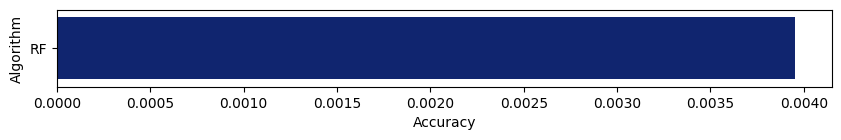

In [ ]:
plt.figure(figsize=[10,1],dpi = 100)

plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
score = cross_val_score(RF,features,target,cv=2)
score

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


array([0.00158479, 0.0015873 ])

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

RF --> 0.003952569169960474


In [ ]:
#print(RF.n_features_)


AttributeError: ignored

In [ ]:
# Assume your input data has 12 features
data = np.array([[1,1,0,1,1,1,1,1,1,1,1,1]])

# Select only the first 12 features
data = data[:, :12]

# Make the prediction using the modified input data
prediction = RF.predict(data)
print(prediction)


['Gauhati University, Guwahati']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
